# Test de Shapiro-Wilk
Se emplea para contrastar normalidad cuando el tamaño de la muestra es menor de 50.
* Ho: Distribución normal
* Ha: Distribucion no-normal

### Otros tests para la evaluación de distribución
* test de kolmogorov-Smirnov.
* test Lilliefors
* test de Jarque-Bera

https://bookdown.org/dietrichson/metodos-cuantitativos/test-de-normalidad.html
https://www.cienciadedatos.net/documentos/8_analisis_normalidad


In [1]:
library(ggplot2)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [6]:
df = read_csv('/home/fer/Documents/cfDNA/Clinical/Concentracion_cfDNA.csv')
#borrar filas vacias
df <- df[rowSums(is.na(df)) != ncol(df),]
df

Rows: 20 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ID, Stage
dbl (1): Concentration

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Stage,Concentration
<chr>,<chr>,<dbl>
UEB-0205,I,0.81
UEB-0208,I,0.88
UEB-0209,II,0.36
UEB-0210,II,1.27
UEB-0211,III,1.07
UEB-0213,II,0.32
UEB-0215,III,0.56
UEB-0216,I,0.50
UEB-0218,III,3.18


In [7]:
shapiro.test(x = df$Concentration)


	Shapiro-Wilk normality test

data:  df$Concentration
W = 0.74157, p-value = 0.0005038


In [9]:
library(ggplot2)

pdf("/home/fer/TestShapiro.pdf", width = 7, height = 7)
#png(file="/home/fer/TestShapiro.png",
#width=560, height=560)

base=ggplot(data=df, aes(x=Concentration))
base=base + labs(title = "Shapiro-Wilk normality test",
       subtitle = "cfDNA concentration distribution", x = expression(Concentration~(ng / mu*l)), y = "Frequency")
base = base + geom_histogram(bins = 20,   color = 'blue', fill="lightblue")
base = base + annotate("rect", xmin = 2.5, xmax = 3.5, ymin = 3.7, ymax = 4.2,
  alpha = .2)
base = base + annotate("text", x = 2.83, y = 4, label = "W = 0.74157")
base = base + annotate("text", x = 3, y = 3.9, label = "p-value = 0.0005038")
base
dev.off()

png 
  2

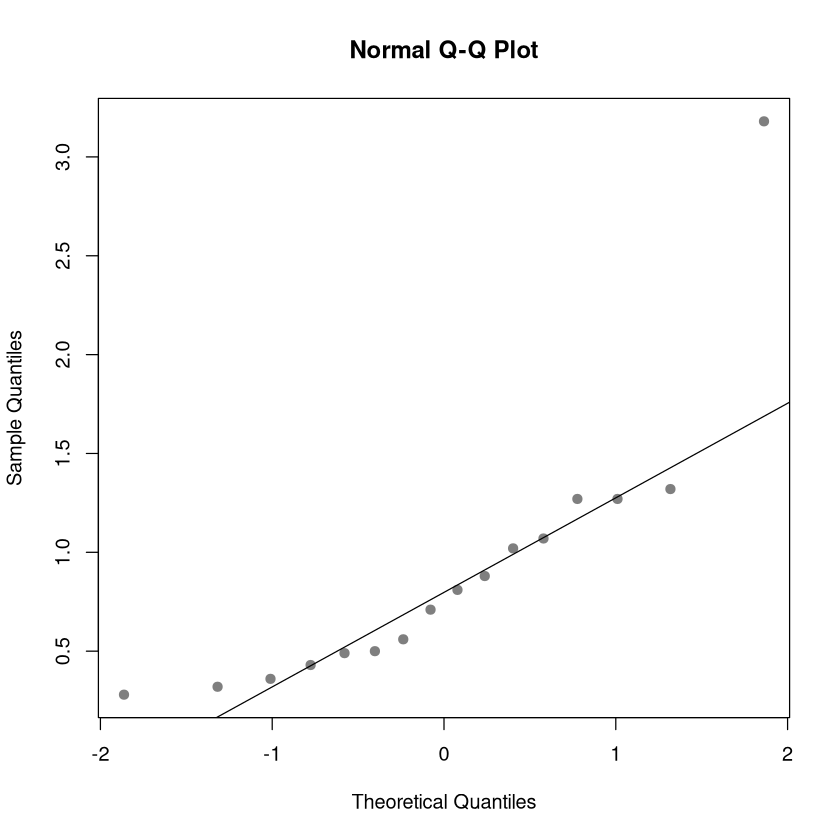

In [15]:
qqnorm(df$Concentration, pch = 19, col = "gray50")
qqline(df$Concentration)

Warning message:
“Unknown or uninitialised column: `Concentrartion`.”
Warning message in mean.default(df$Concentrartion):
“argument is not numeric or logical: returning NA”
Warning message:
“Unknown or uninitialised column: `Concentrartion`.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 101 row(s) containing missing values (geom_path).”


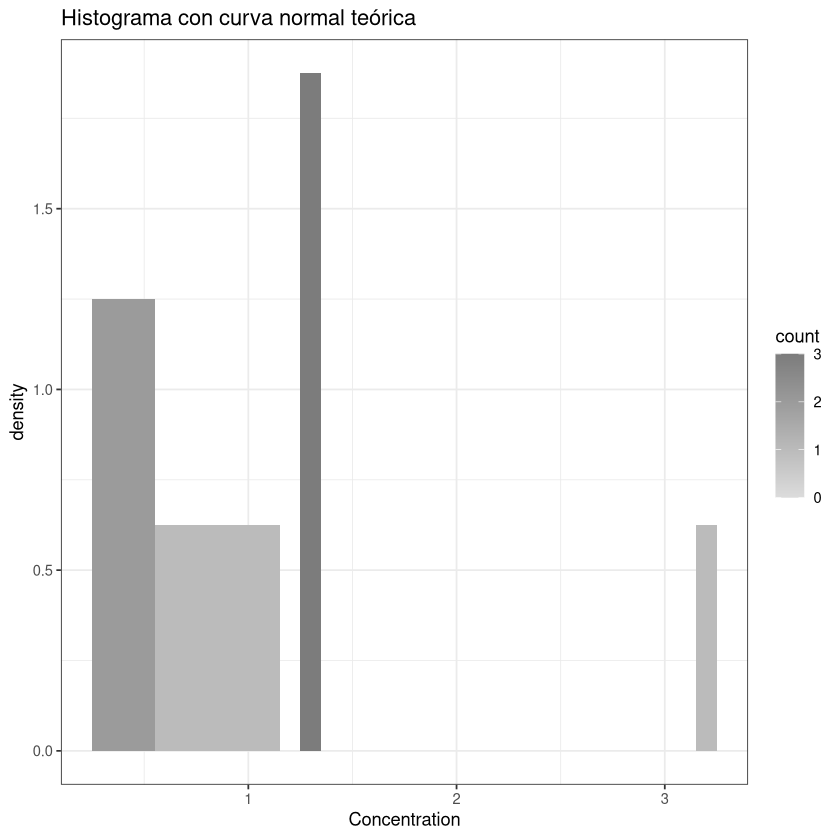

In [18]:
library(ggplot2)

ggplot(data = df, aes(x = Concentration)) +
  geom_histogram(aes(y = ..density.., fill = ..count..)) +
  scale_fill_gradient(low = "#DCDCDC", high = "#7C7C7C") +
  stat_function(fun = dnorm, colour = "firebrick",
                args = list(mean = mean(df$Concentrartion),
                            sd = sd(df$Concentrartion))) +
  ggtitle("Histograma con curva normal teórica") +
  theme_bw()

In [11]:
df = read_csv('/home/fer/Documents/cfDNA/Clinical/TumoralFraction.csv')
#borrar filas vacias
df <- df[rowSums(is.na(df)) != ncol(df),]
head(df)

Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ID
dbl (1): Fracción_tumoral

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Fracción_tumoral
<chr>,<dbl>
UEB-0228,0.01414
UEB-0205,0.00000
UEB-0208,0.01832
UEB-0209,0.01756
UEB-0210,0.01458
UEB-0211,0.02001


null device 
          1

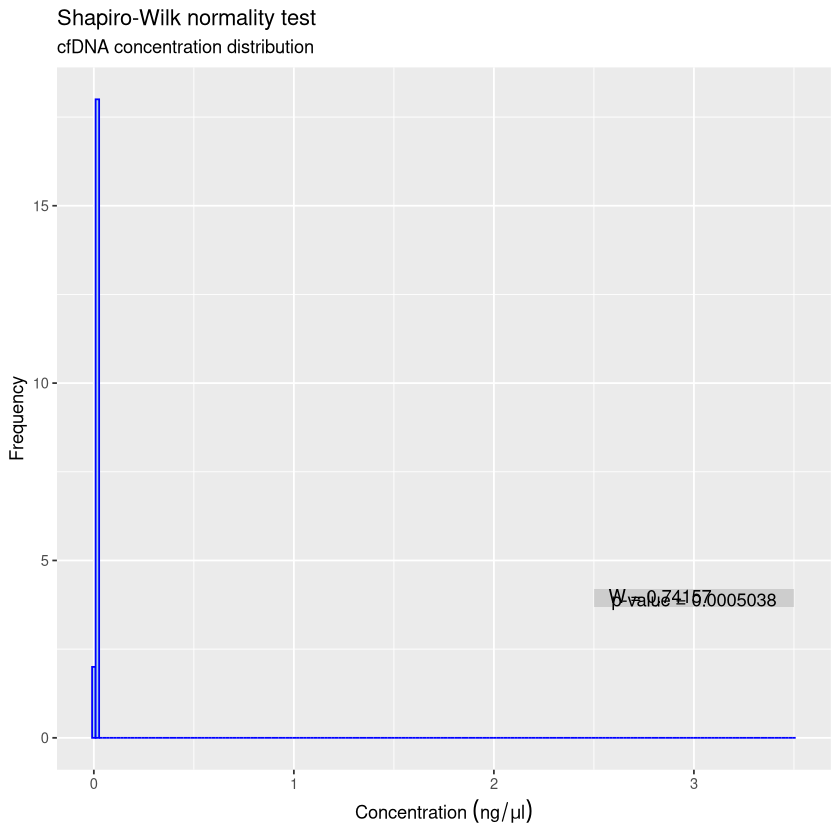

In [12]:
library(ggplot2)

#pdf("/home/fer/HistoTumorFraction.pdf", width = 7, height = 7)


base=ggplot(data=df, aes(x=Fracción_tumoral))
base=base + labs(title = "Shapiro-Wilk normality test",
       subtitle = "cfDNA concentration distribution", x = expression(Concentration~(ng / mu*l)), y = "Frequency")
base = base + geom_histogram(bins = 200,   color = 'blue', fill="lightblue")
base = base + annotate("rect", xmin = 2.5, xmax = 3.5, ymin = 3.7, ymax = 4.2,
  alpha = .2)
base = base + annotate("text", x = 2.83, y = 4, label = "W = 0.74157")
base = base + annotate("text", x = 3, y = 3.9, label = "p-value = 0.0005038")
base
dev.off()